In [1]:
# Data exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from NYC_GetCleaned_HistoricData import getCleanedDataFrame
from NYC_GetCleaned_TotalPopulation import getMeanPopulation
import data_utility

MemoryError: 

In [2]:
#Get the Current working directory
crimes_original = getCleanedDataFrame()

In [4]:
"""Create a datetime index of times that crimes were reported to have been committed"""

dfCopy = crimes_original.copy()
def eliminate_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2010':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

#get dummy columns for crime categories
#dfCopy = dfCopy.join(dfCopy['LAW_CAT_CD'].str.get_dummies())

dfCopy = dfCopy.join(dfCopy['BORO_NM'].str.get_dummies())

#Create index with DateTime
dfCopy['CMPLNT_FR_DT'] = dfCopy['CMPLNT_FR_DT'].str.split("/")
dfCopy['CMPLNT_FR_DT'] = dfCopy['CMPLNT_FR_DT'].apply(lambda x: eliminate_dates(x))

#Combing date and time columns
dfCopy['StartTime'] = dfCopy['CMPLNT_FR_DT'] +' '+dfCopy['CMPLNT_FR_TM']
dfCopy['StartTime'] = pd.to_datetime(dfCopy['StartTime'])

#set full date as index
dfCopy.set_index('StartTime', inplace=True)          

dfCopy.head()

NameError: name 'crimes_original' is not defined

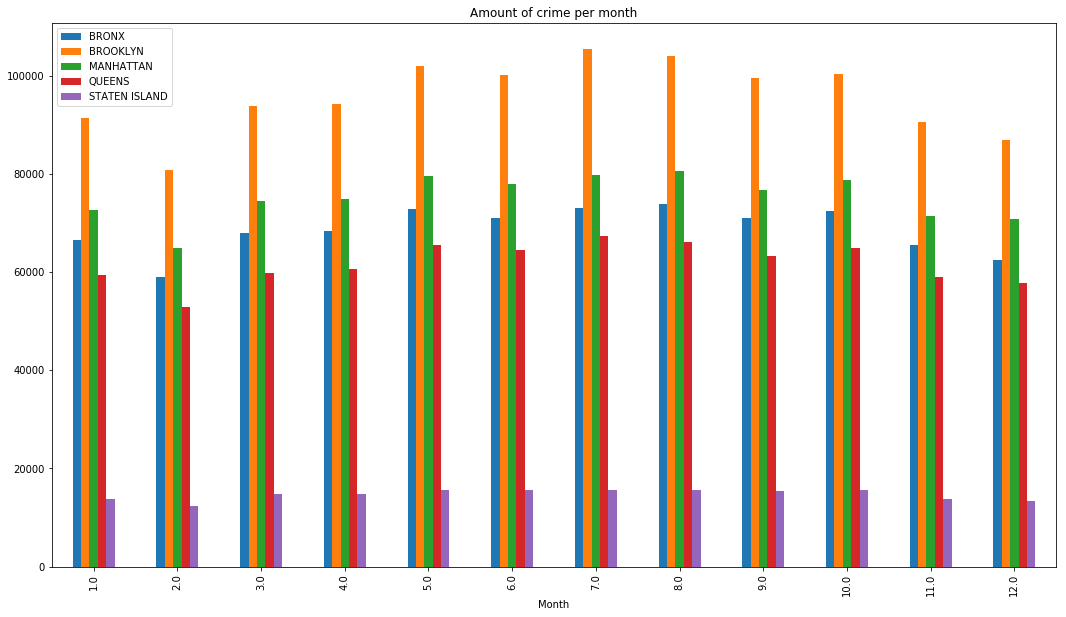

In [23]:
dfMonth = dfCopy.copy()
dfMonth.index = dfMonth.index.month
vis1 = dfMonth.groupby([dfMonth.index.get_level_values(0)])[['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']].sum()
vis1.divide(boro_crimes['Crime_per_pop'])
vis1.plot.bar(figsize=(18,10))
plt.title('Amount of crime per month')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

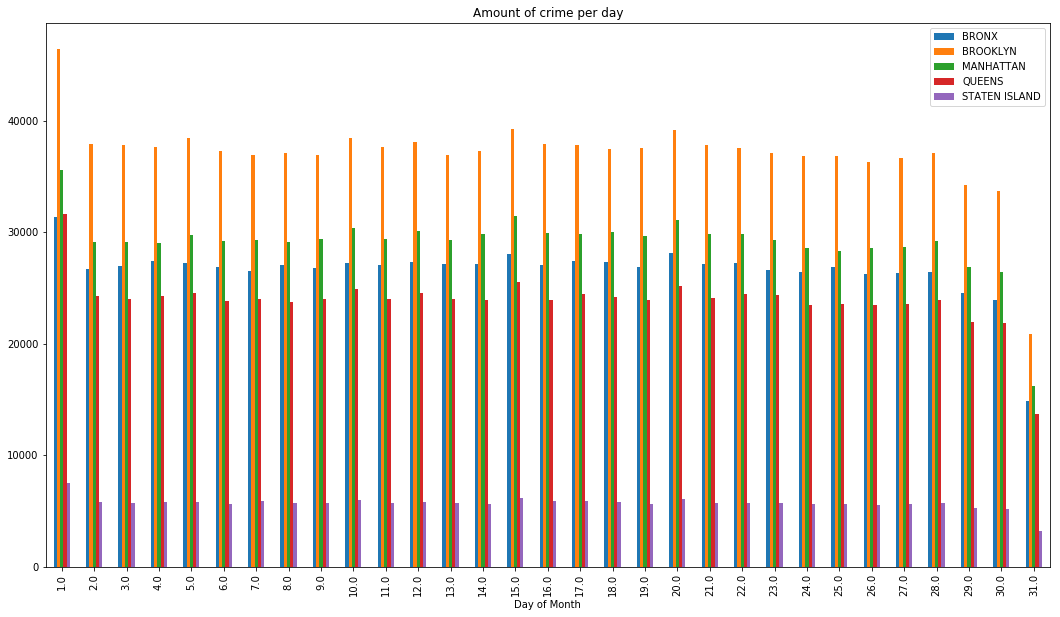

In [9]:
dfDay = dfCopy.copy() 
dfDay.index = dfDay.index.day
vis2 = dfDay.groupby([dfDay.index.get_level_values(0)])[['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']].sum()

vis2.plot.bar(figsize=(18,10))
plt.title('Amount of crime per day')
plt.xlabel('Day of Month')
plt.show()

In [2]:
dfHour = dfCopy.copy() 
dfHour.index = dfHour.index.hour  

vis3 = dfHour.groupby([dfHour.index.get_level_values(0)])[['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']].sum()
vis3.plot.bar(figsize=(18,10))
plt.title('Amount of crime per hour')
plt.xlabel('Time of day')
plt.show()

NameError: name 'dfCopy' is not defined

In [12]:
#Get the total mean population of NYC based on borough
""" Bronx - 1, Brooklyn - 2, Manhattan - 3, Queens - 4, Staten Island - 5 """

bronxPop = getMeanPopulation('Bronx', 1)
brookylnPop = getMeanPopulation('Brooklyn', 2)
manhattanPop = getMeanPopulation('Manhattan', 3)
queensPop = getMeanPopulation('Queens', 4)
statIslandPop = getMeanPopulation('Staten Island', 5)

In [3]:
"""All NYC crimes reported by boro """

crimesByBoro = dfCopy.copy()
crimesByBoro.index = crimesByBoro.index.year
crimesByBoro['BORO_NM'].value_counts().plot.bar(figsize=(20,20))

plt.ylabel('Count')
plt.title('All crimes by Borough')
plt.show()

NameError: name 'dfCopy' is not defined

In [14]:
b1 = crimesByBoro['BORO_NM'].value_counts()
borough1 = pd.DataFrame(b1).reset_index()
borough1.columns=['Borough','Crimes']

In [15]:
boro_pop = { 'Borough': ['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND'],
             'Mean Population': [brookylnPop,manhattanPop,bronxPop,queensPop,statIslandPop]
           }

In [16]:
boro_pop_df = pd.DataFrame(boro_pop)

In [17]:
boro_crimes = borough1.merge(boro_pop_df, on='Borough')

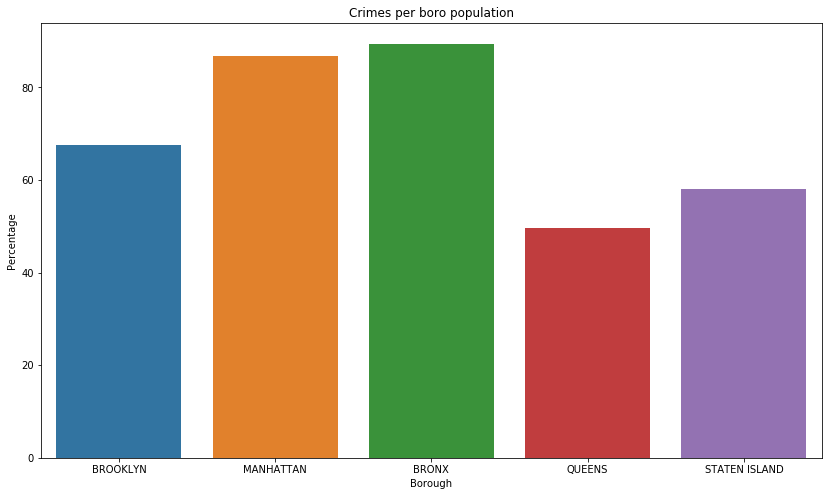

In [18]:
boro_crimes['Crime_per_pop'] =  (boro_crimes['Crimes'] / boro_crimes['Mean Population'])

a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Borough', y='Crime_per_pop', data=boro_crimes, ax=ax)
plt.ylabel('Percentage')
plt.title('Crimes per boro population')
plt.show()